Imports

In [10]:
import pandas as pd
from geopy import distance
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import trim_mean

Calculo do erro e separação dos Dataframes

In [11]:
geoGold = pd.read_csv('DadosGeoeGoldBH.csv')

In [12]:
#Calculando o erro das GeoAPIs. Erro é a distância entre o ponto geocodificado e o ponto referência

geoGold['erro'] = geoGold.apply(lambda row: distance.distance((row['latGold'], row['lonGold']), (row['lat'], row['long'])).km if pd.notnull(row['lat']) and pd.notnull(row['long']) else None, axis=1)

geoGold.to_csv('geoGold_erro.csv', index=False)

In [13]:
geoGold.head()

,Unnamed: 0.1,number_x,CEP,street,bairro,city,state,lonGold,latGold,id,Unnamed: 0,geoapi_id,request_id,lat,long,accuracy,number_y,district,public_place,erro
0,0,73,31545170.0,RUA CARLOS LACERDA,Bairro do Trevo,BELO HORIZONTE,MG,-44.008679,-19.833161,2767600,0,OpenRouteService,2767600,-19.833723,-44.009705,0.800000,73,NaN,RUA CARLOS LACERDA,0.124175
1,1,73,31545170.0,RUA CARLOS LACERDA,Bairro do Trevo,BELO HORIZONTE,MG,-44.008679,-19.833161,2767600,1,TomTom,2767600,-19.833170,-44.008610,14.282460,73,NaN,RUA CARLOS LACERDA,0.007276
2,2,73,31545170.0,RUA CARLOS LACERDA,Bairro do Trevo,BELO HORIZONTE,MG,-44.008679,-19.833161,2767600,2,Google,2767600,-19.833137,-44.008699,NaN,73,NaN,RUA CARLOS LACERDA,0.003482
3,3,73,31545170.0,RUA CARLOS LACERDA,Bairro do Trevo,BELO HORIZONTE,MG,-44.008679,-19.833161,2767600,3,MapBox,2767600,-19.833161,-44.008679,0.795556,73,NaN,RUA CARLOS LACERDA,0.000053
4,4,18,30240500.0,RUA PEDRO JOSE MOREIRA,Bairro São Lucas,BELO HORIZONTE,MG,-43.914159,-19.929574,2767601,4,MapBox,2767601,-19.929574,-43.914159,0.801728,18,NaN,RUA PEDRO JOSE MOREIRA,0.000022


In [14]:
geoGold = pd.read_csv('geoGold_erro.csv')

In [15]:
#Separando os dataframes para plotar nos gráficos

mapbox = geoGold[geoGold['geoapi_id' ] == 'MapBox']
mapbox.name = 'Mapbox'

google = geoGold[geoGold['geoapi_id'] == 'Google']
google.name = 'Google'

tomtom = geoGold[geoGold['geoapi_id'] == 'TomTom']
tomtom.name = 'TomTom'

ors = geoGold[geoGold['geoapi_id'] == 'OpenRouteService']
ors.name = 'Open Route Service'

In [16]:
print('Mapbox:',len(mapbox), 'Google:', len(google), 'Tomtom:', len(tomtom), 'ORS:', len(ors))

Mapbox: 84966 Google: 84941 Tomtom: 84981 ORS: 84864


Cálculo das Métricas

In [17]:
n = 85000.0 #qtd de endereços total
metricas = pd.DataFrame(columns=['api', 'media', 'mediana', 'desvio_padrao', 'media_aparada', 'taxa_resposta', 'taxa_acerto'])

contador = len(mapbox[mapbox['erro'] <= 0.150])
m_mapbox = {'api':'Mapbox', 'media':mapbox['erro'].mean(), 'mediana':mapbox['erro'].median(), 'desvio_padrao':mapbox['erro'].std(), 'media_aparada':trim_mean(mapbox['erro'], 0.05), 'taxa_resposta':(mapbox.shape[0]/n), 'taxa_acerto':(contador/n)}
metricas = metricas.append(m_mapbox, ignore_index=True)

contador = len(google[google['erro'] <= 0.150])
m_google = {'api':'Google Maps', 'media':google['erro'].mean(), 'mediana':google['erro'].median(), 'desvio_padrao':google['erro'].std(), 'media_aparada':trim_mean(google['erro'], 0.05), 'taxa_resposta':(google.shape[0]/n), 'taxa_acerto':(contador/n)}
metricas = metricas.append(m_google, ignore_index=True)

contador = len(tomtom[tomtom['erro'] <= 0.150])
m_tomtom = {'api':'TomTom', 'media':tomtom['erro'].mean(), 'mediana':tomtom['erro'].median(), 'desvio_padrao':tomtom['erro'].std(), 'media_aparada':trim_mean(tomtom['erro'], 0.05), 'taxa_resposta':(tomtom.shape[0]/n), 'taxa_acerto':(contador/n)}
metricas = metricas.append(m_tomtom, ignore_index=True)

contador = len(ors[ors['erro'] <= 0.150])
m_ors = {'api':'Open Route Service', 'media':ors['erro'].mean(), 'mediana':ors['erro'].median(), 'desvio_padrao':ors['erro'].std(), 'media_aparada':trim_mean(ors['erro'], 0.05), 'taxa_resposta':(ors.shape[0]/n), 'taxa_acerto':(contador/n)}
metricas = metricas.append(m_ors, ignore_index=True)


metricas

C:\Users\analu\AppData\Local\Temp\ipykernel_7388\866904221.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metricas = metricas.append(m_mapbox, ignore_index=True)
C:\Users\analu\AppData\Local\Temp\ipykernel_7388\866904221.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metricas = metricas.append(m_google, ignore_index=True)
C:\Users\analu\AppData\Local\Temp\ipykernel_7388\866904221.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metricas = metricas.append(m_tomtom, ignore_index=True)
C:\Users\analu\AppData\Local\Temp\ipykernel_7388\866904221.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metricas = metricas.append(m_

,api,media,mediana,desvio_padrao,media_aparada,taxa_resposta,taxa_acerto
0,Mapbox,3.285774,0.000056,24.758655,1.070137,0.999600,0.768235
1,Google Maps,2.492406,0.009819,5.846543,1.614545,0.999306,0.736118
2,TomTom,11.291340,0.114679,56.642402,2.844634,0.999776,0.517988
3,Open Route Service,6.482803,7.570231,5.536418,6.294010,0.998400,0.251835


Histogramas

In [18]:
# Calcule os valores do erro
erro_mapbox = mapbox['erro']
erro_tomtom = tomtom['erro']
erro_google = google['erro']
erro_ors = ors['erro']

C:\Users\analu\AppData\Local\Temp\ipykernel_7388\676904370.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(mapbox['erro'], bins=100, label='MapBox')
C:\Users\analu\AppData\Local\Temp\ipykernel_7388\676904370.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(google['erro'], bins=100, label=

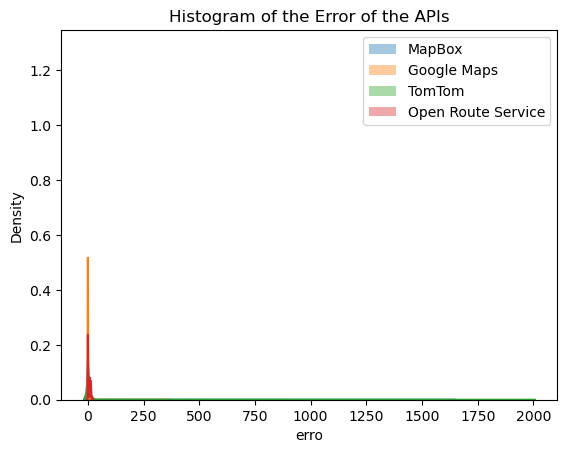

In [19]:
import seaborn as sns

limite = 50
sns.distplot(mapbox['erro'], bins=100, label='MapBox')
sns.distplot(google['erro'], bins=100, label='Google Maps')
sns.distplot(tomtom['erro'], bins=100, label='TomTom')
sns.distplot(ors['erro'], bins=100, label='Open Route Service')

plt.legend()  # Adicione uma legenda com base nos rótulos definidos acima

plt.title('Histogram of the Error of the APIs')
plt.show()

C:\Users\analu\AppData\Local\Temp\ipykernel_7388\2045508231.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(mapbox['erro'][mapbox['erro'] < limite], bins=100, label='MapBox')
C:\Users\analu\AppData\Local\Temp\ipykernel_7388\2045508231.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(googl

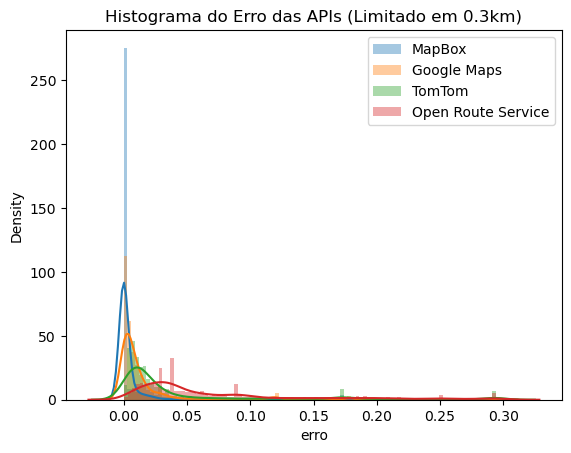

In [25]:
limite = 0.3
sns.distplot(mapbox['erro'][mapbox['erro'] < limite], bins=100, label='MapBox')
sns.distplot(google['erro'][google['erro'] < limite], bins=100, label='Google Maps')
sns.distplot(tomtom['erro'][tomtom['erro'] < limite], bins=100, label='TomTom')
sns.distplot(ors['erro'][ors['erro'] < limite], bins=100, label='Open Route Service')

plt.legend()  # Adicione uma legenda com base nos rótulos definidos acima

plt.title('Histograma do Erro das APIs (Limitado em '+str(limite)+'km)')
plt.show()

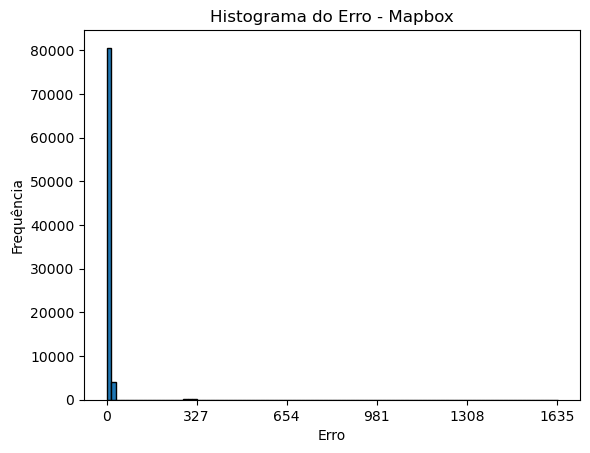

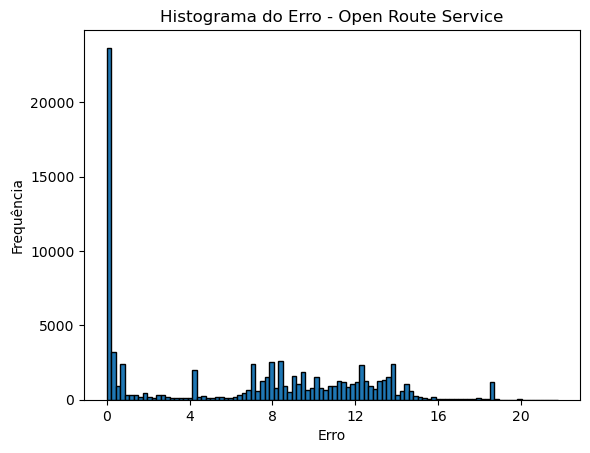

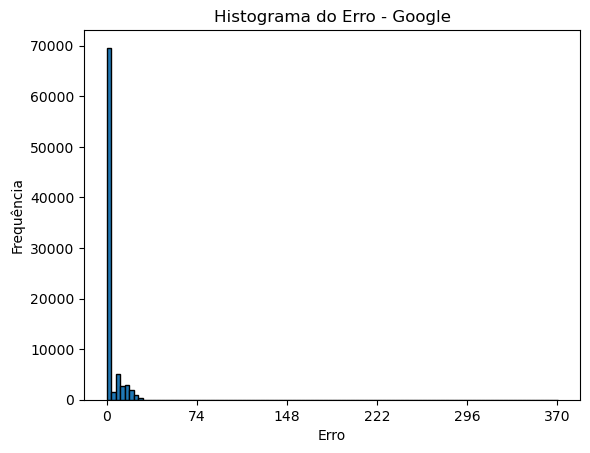

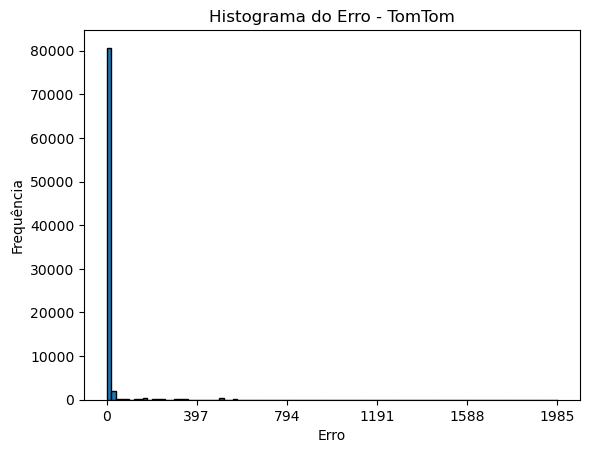

In [23]:
apis = [mapbox, ors, google, tomtom]

for api in apis:
    # Crie a figura e os eixos
    fig, ax = plt.subplots()

    # Crie o histograma
    ax.hist(api['erro'], bins=100, edgecolor='black')
    s = int(max(api['erro']) / 5)
    ax.set_xticks(np.arange(0, max(api['erro']), s))

    # Adicione rótulos e título
    ax.set_xlabel('Erro')
    ax.set_ylabel('Frequência')
    ax.set_title(f'Histograma do Erro - {api.name}')

    hist_erro = plt.gcf()